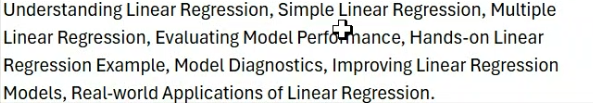

## Linear Regression

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# !pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.1/9.9 MB 919.0 kB/s eta 0:00:11
    --------------------------------------- 0.1/9.9 MB 983.0 kB/s eta 0:00:10
    --------------------------------------- 0.2/9.9 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.3/9.9 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.5/9.9 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/9.9 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/9.9 MB 1.8 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.9 MB 1.9 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/9.9 MB 1.9 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/9.9 MB 2.1 MB/s eta 0:00:05
   ---- ----------------------------------- 1.2/9.9 MB 2.2 MB/s eta 0:00:05
   ----- ------


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import statsmodels.api as sm 

In [7]:
df = pd.read_csv('data/NorthAmericaUniversities.csv', delimiter=",", encoding="ISO-8859-1")
df.head()

,Rank,Name,Country,Established,Academic Staff,Number of Students,Minimum Tuition cost,Volumes in the library,Endowment
0,1,Massachusetts Institute of Technology,us,1861,1069.0,11920.0,"$50,000.00",1351391.0,$24.6B
1,2,Harvard University,us,1636,2400.0,21613.0,"$50,000.00",14440248.0,$50.7B
2,3,Stanford University,us,1885,2323.0,17529.0,"$50,000.00",6625926.0,$36.5B
3,4,Cornell University,us,1865,1639.0,26284.0,"$50,000.00",5270855.0,$10.7B
4,5,"University of California, Berkeley",us,1868,NaN,45307.0,"$12,500.00",7718398.0,$7.4B


In [8]:
df.describe()

,Rank,Established,Academic Staff,Number of Students,Volumes in the library
count,200.000000,200.000000,181.000000,199.000000,1.760000e+02
mean,100.500000,1875.990000,2632.530387,29964.045226,2.178546e+06
std,57.879185,56.941298,1940.948590,17395.568965,2.295093e+06
min,1.000000,1636.000000,161.000000,1577.000000,1.202800e+04
25%,50.750000,1849.500000,1288.000000,17078.000000,9.074560e+05
50%,100.500000,1876.000000,2103.000000,26809.000000,1.501361e+06
75%,150.250000,1908.000000,3476.000000,39093.500000,2.597085e+06
max,200.000000,1974.000000,10810.000000,101816.000000,1.444025e+07


In [9]:
df2 = df.dropna()
print(df2.shape)
df2.head()

(157, 9)


,Rank,Name,Country,Established,Academic Staff,Number of Students,Minimum Tuition cost,Volumes in the library,Endowment
0,1,Massachusetts Institute of Technology,us,1861,1069.0,11920.0,"$50,000.00",1351391.0,$24.6B
1,2,Harvard University,us,1636,2400.0,21613.0,"$50,000.00",14440248.0,$50.7B
2,3,Stanford University,us,1885,2323.0,17529.0,"$50,000.00",6625926.0,$36.5B
3,4,Cornell University,us,1865,1639.0,26284.0,"$50,000.00",5270855.0,$10.7B
5,6,University of Michigan,us,1817,8189.0,52065.0,"$15,000.00",11963205.0,$19.2B


In [10]:
df2.dtypes

Rank                        int64
Name                       object
Country                    object
Established                 int64
Academic Staff            float64
Number of Students        float64
Minimum Tuition cost       object
Volumes in the library    float64
Endowment                  object
dtype: object

In [13]:
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace("$", "").replace(",", "")
        if "B" in value:
            return float(value.replace("B", "")) * 1e9
        elif "M" in value:
            return float(value.replace("M", "")) * 1e6
    return float(value)


df2["Minimum Tuition cost"] = df2["Minimum Tuition cost"].apply(convert_to_numeric)
df2["Endowment"] = df2["Endowment"].apply(convert_to_numeric)

df2.dtypes

C:\Users\hp328\AppData\Local\Temp\ipykernel_17500\3525043486.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Minimum Tuition cost"] = df2["Minimum Tuition cost"].apply(convert_to_numeric)
C:\Users\hp328\AppData\Local\Temp\ipykernel_17500\3525043486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Endowment"] = df2["Endowment"].apply(convert_to_numeric)


Rank                        int64
Name                       object
Country                    object
Established                 int64
Academic Staff            float64
Number of Students        float64
Minimum Tuition cost      float64
Volumes in the library    float64
Endowment                 float64
dtype: object

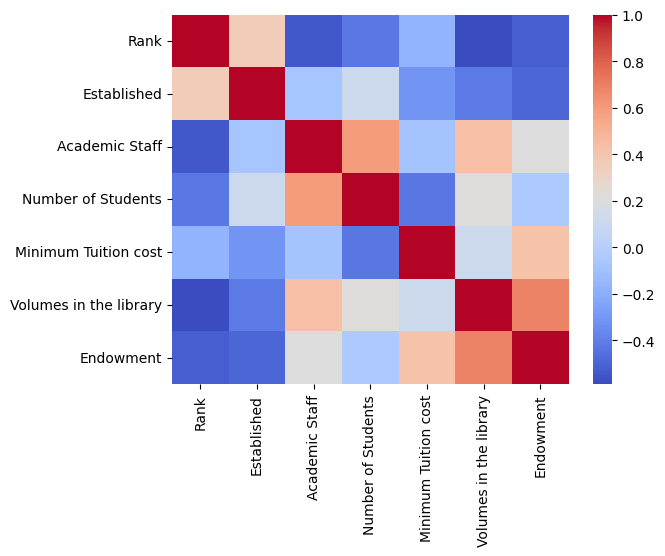

In [16]:
correlation = df2.corr(numeric_only=True)
sns.heatmap(correlation, cmap='coolwarm')
plt.show()

In [15]:
correlation #Academic staff is depending on No of students, 

,Rank,Established,Academic Staff,Number of Students,Minimum Tuition cost,Volumes in the library,Endowment
Rank,1.000000,0.356496,-0.548311,-0.422394,-0.172175,-0.587962,-0.520507
Established,0.356496,1.000000,-0.068245,0.107678,-0.312658,-0.417212,-0.494722
Academic Staff,-0.548311,-0.068245,1.000000,0.591190,-0.083367,0.433997,0.210112
Number of Students,-0.422394,0.107678,0.591190,1.000000,-0.431325,0.217329,-0.047933
Minimum Tuition cost,-0.172175,-0.312658,-0.083367,-0.431325,1.000000,0.108761,0.414047
Volumes in the library,-0.587962,-0.417212,0.433997,0.217329,0.108761,1.000000,0.683836
Endowment,-0.520507,-0.494722,0.210112,-0.047933,0.414047,0.683836,1.000000


In [18]:
numeric_df = df2.drop(columns=['Name', 'Country'])
numeric_df.head()

,Rank,Established,Academic Staff,Number of Students,Minimum Tuition cost,Volumes in the library,Endowment
0,1,1861,1069.0,11920.0,50000.0,1351391.0,2.460000e+10
1,2,1636,2400.0,21613.0,50000.0,14440248.0,5.070000e+10
2,3,1885,2323.0,17529.0,50000.0,6625926.0,3.650000e+10
3,4,1865,1639.0,26284.0,50000.0,5270855.0,1.070000e+10
5,6,1817,8189.0,52065.0,15000.0,11963205.0,1.920000e+10


### Now we want create a model using *Linear Regression* which tries to predict the Rank of a university based on the other given informations

In [23]:
X = numeric_df.drop(columns=['Rank'])
y = numeric_df['Rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(109, 6) (48, 6) (109,) (48,)


In [30]:
X = sm.add_constant(X)
# y = sm.add_constant(y)
model = sm.OLS(y,X)
model

In [31]:
res = model.fit()
# res.summary()

In [32]:
model.predict(X_test)

ValueError: shapes (157,7) and (48,6) not aligned: 7 (dim 1) != 48 (dim 0)